In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import itertools
from math import pi

In [2]:
# create instance of the class "Class"
LambdaCDM1 = Class()
# pass input parameters
LambdaCDM1.set({'omega_b':0.022032,'omega_cdm':0.12010,'h':0.6732117,'A_s': 2.100549e-09,'n_s':0.9660499,'tau_reio':0.0543})
LambdaCDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM1.compute()
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk1 = [] # P(k) in (Mpc/h)**3
h1 = LambdaCDM1.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk1.append(LambdaCDM1.pk(k*h1,0.)*h1**3) # function .pk(k,z)

cls_lcdm = LambdaCDM1.lensed_cl(2500)
ll_lcdm = cls_lcdm['ell'][2:]
clTT_lcdm = cls_lcdm['tt'][2:]
clEE_lcdm = cls_lcdm['ee'][2:]
clPP_lcdm = cls_lcdm['pp'][2:]
LambdaCDM1.struct_cleanup()

In [86]:
# Definir parámetros cosmológicos comunes
k_out = [0.1]  # unidades de 1/Mpc

common_settings = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.6,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'm_phi_schm': 1e-16,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-18,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para theta_schm
x_variable = [ 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 10, 100]

# Background
z_all = []
#H_z_all = []
a_all = []
Omega_rad_all = []
Omega_bar_all = []
Omega_lambda_all = []
Omega_sch_all = []
w_sch_all = []
w_all = []
rho_rel_all = []
# Listas para perturbaciones lineales
clTT_all = []
clEE_all = []
clPP_all = []
Pk_all = []
ll_all = []
#kk_all = []  # Para almacenar los valores de k

# Ciclo para iterar sobre los diferentes valores de theta_schm
for x in x_variable:
    common_settings['x0_schm'] = x  # Actualizar el valor de theta_schm
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    #H_z = background['H [1/Mpc]']          # Hubble parameter H(z)
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']     # Densidad de energía de fotones 
    rad = rho_gamma + rho_nu              # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w = p_sch/rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all.append(z)
    #H_z_all.append(H_z)
    a_all.append(a)
    Omega_rad_all.append(Omega_rad)
    Omega_bar_all.append(Omega_bar)
    Omega_lambda_all.append(Omega_lambda)
    Omega_sch_all.append(Omega_sch)
    w_sch_all.append(w_sch)
    w_all.append(w)
    rho_rel_all.append(rho_rel)
    
    # Ahora obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all.append(clTT)
    clEE_all.append(clEE)
    clPP_all.append(clPP)
    ll_all.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k) y k
    #kk_all.append(kk)
    Pk_all.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()

# Ahora tienes todos los valores guardados en las listas
# Puedes hacer gráficas o análisis adicional aquí


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.35129
aquí voy y todo bien 2.67063
aquí voy y todo bien 2.01096
aquí voy y todo bien 2.08062
aquí voy y todo bien 2.04579
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06294
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.35129
aquí voy y todo bien 2.67062
aquí voy y todo bien 2.01096
aquí voy y todo bien 2.08062
aquí voy y todo bien 2.04579
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08035
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.35128
aquí voy y todo bien 2.67061
aquí voy y todo bien 2.01095
aquí voy y todo bien 2.0806
aquí voy y todo bien 2.04577
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06292
aquí voy y todo bien 2.08006
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.35118
aquí voy y todo bien 2.67049
aquí voy y todo bien 2.01083
aquí voy y todo bien 2.08044
aquí 

CosmoComputationError: 

Error in Class: background_init(L:675) :condition (pba->shooting_failed == _TRUE_) is true; Shooting failed, try optimising input_get_guess(). Error message:

input_init(L:329) :error in input_find_root(&xzero, &fevals, &fzw, errmsg);
=>input_find_root(L:4969) :error in class_fzero_ridder(input_fzerofun_1d, x1, x2, 1e-5*(((fabs(x1))<(fabs(x2))) ? (fabs(x2)) : (fabs(x1)) ), pfzw, &f1, &f2, xzero, fevals, errmsg);
=>class_fzero_ridder(L:4490) :error; root must be bracketed in zriddr.

In [ ]:
plt.figure(figsize=(12, 9))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_sch_all[i], label = " $\Omega _{\phi}, \; \\theta = $"+str(x_variable[i]))
    
#plt.plot(a0,Omega_lambda0+Omega_rad0+Omega_sch0+Omega_bar0,color="green",label="Constricción de Friedmann")
#plt.plot(a,Omega_rad,color="black",label="$\Omega _{\gamma}$")
#plt.plot(a,Omega_bar,color="red",label="$\Omega _{b}$")
#plt.plot(a,Omega_sch,"--",color="blue",label="$\Omega _{\phi DM}$")
#plt.plot(a,Omega_lambda, "--", color="purple" ,label="$\Omega _{\phi DE}$")
#plt.plot(a,Omega_sch + Omega_lambda, color="blue",label="$\Omega _{\phi}$")


#plt.plot(a,Omega_lambda+Omega_cdm+Omega_bar+Omega_rad,color="black",label="$\Omega _{total}$")
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

In [ ]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i in range(len(Omega_rad_all)):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a,w_all[i],"--",label="$\\theta = $"+str(x_variable[i]))


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

In [ ]:
# plot C_l^TT
from math import pi
plt.figure(1)
plt.xscale('log');
plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(len(ll_all)):
    plt.plot(ll_all[i],clTT_all[i]*ll_all[i]*(ll_all[i]+1)/2./pi,label = " $\\theta = $"+str(x_variable[i]))
plt.legend()

In [ ]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i in range(1,2):#range(len(Pk_all)):
 plt.plot(kk,Pk_all[i], label = " $\\theta = $"+str(x_variable[i]))
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [ ]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i in range(len(Pk_all)):
 plt.plot(kk,Pk_all[i], label = " $\\theta = $"+str(x_variable[i]))
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [67]:
# Definir parámetros cosmológicos comunes
k_out = [0.1]  # unidades de 1/Mpc

In [4]:
common_settings0 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    #'theta_schm': 2.7e-14,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable0 = [1e-3]
m_variable0 = [1e-17,1e-18,1e-19,1e-20]
theta_variable = [2.7e-16, 2.7e-17, 2.7e-18]
#lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations0 = list(itertools.product(x_variable0, m_variable0, theta_variable))

# Background
z_all0 = []
a_all0 = []
Omega_rad_all0 = []
Omega_bar_all0 = []
Omega_lambda_all0 = []
Omega_sch_all0 = []
w_sch_all0 = []
rho_rel_all0 = []

# Listas para perturbaciones lineales
clTT_all0 = []
clEE_all0 = []
clPP_all0 = []
Pk_all0 = []
ll_all0 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, m, th in combinations0:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['m_phi_schm'] = m       # Actualizar el valor de V0_schm
    common_settings0['theta_schm'] = th  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x},mphi={m}, theta = {th}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all0.append(z)
    a_all0.append(a)
    Omega_rad_all0.append(Omega_rad)
    Omega_bar_all0.append(Omega_bar)
    Omega_lambda_all0.append(Omega_lambda)
    Omega_sch_all0.append(Omega_sch)
    w_sch_all0.append(w_sch)
    rho_rel_all0.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all0.append(clTT)
    clEE_all0.append(clEE)
    clPP_all0.append(clPP)
    ll_all0.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all0.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, mphi={m}, theta = {th}")
    

# Graficar los resultados
print("cálculos terminados")



iniciando cálculos con la combinación: x0=0.001,mphi=1e-17, theta = 2.7e-16
El cálculo se ha completado con la combinación x0=0.001, mphi=1e-17, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.001,mphi=1e-17, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-17, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.001,mphi=1e-17, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-17, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.001,mphi=1e-18, theta = 2.7e-16
El cálculo se ha completado con la combinación x0=0.001, mphi=1e-18, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.001,mphi=1e-18, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-18, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.001,mphi=1e-18, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-18, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.001,mphi=1e-19, theta = 2.7e-16


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-19, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.001,mphi=1e-19, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-19, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.001,mphi=1e-19, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-19, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.001,mphi=1e-20, theta = 2.7e-16


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-20, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.001,mphi=1e-20, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.001, mphi=1e-20, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.001,mphi=1e-20, theta = 2.7e-18
El cálculo se ha completado con la combinación x0=0.001, mphi=1e-20, theta = 2.7e-18
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


In [5]:
combinations0

[(0.001, 1e-17, 2.7e-16),
 (0.001, 1e-17, 2.7e-17),
 (0.001, 1e-17, 2.7e-18),
 (0.001, 1e-18, 2.7e-16),
 (0.001, 1e-18, 2.7e-17),
 (0.001, 1e-18, 2.7e-18),
 (0.001, 1e-19, 2.7e-16),
 (0.001, 1e-19, 2.7e-17),
 (0.001, 1e-19, 2.7e-18),
 (0.001, 1e-20, 2.7e-16),
 (0.001, 1e-20, 2.7e-17),
 (0.001, 1e-20, 2.7e-18)]

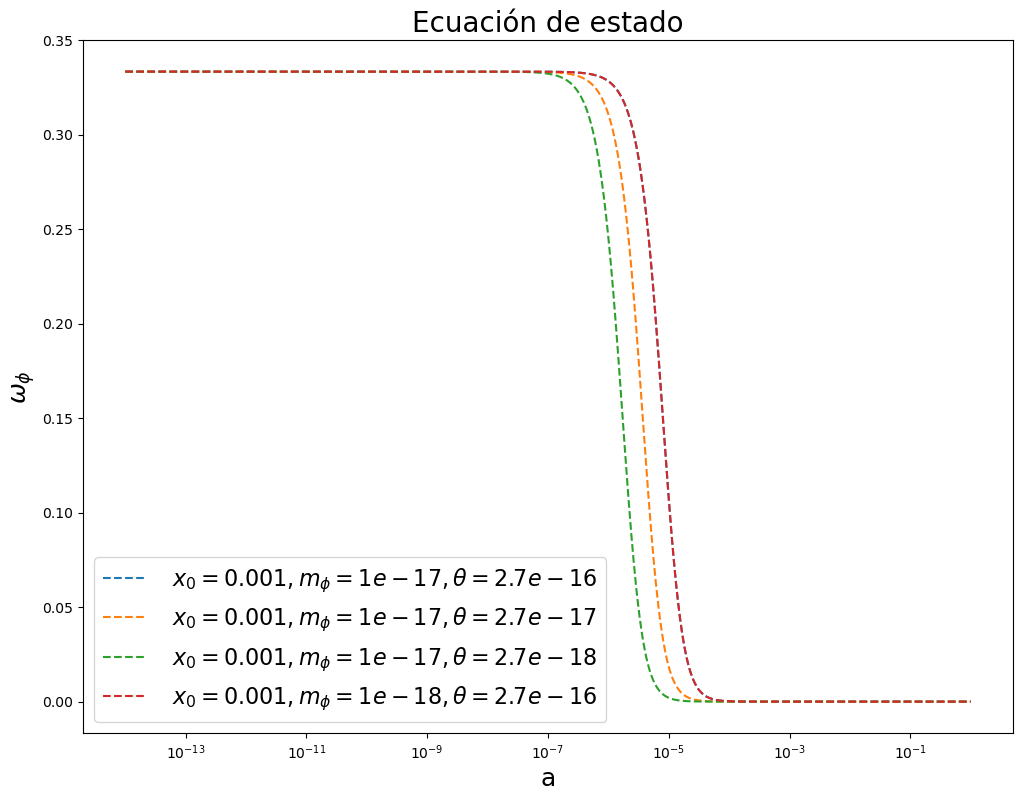

In [6]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, m, th) in enumerate(combinations0[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
#plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

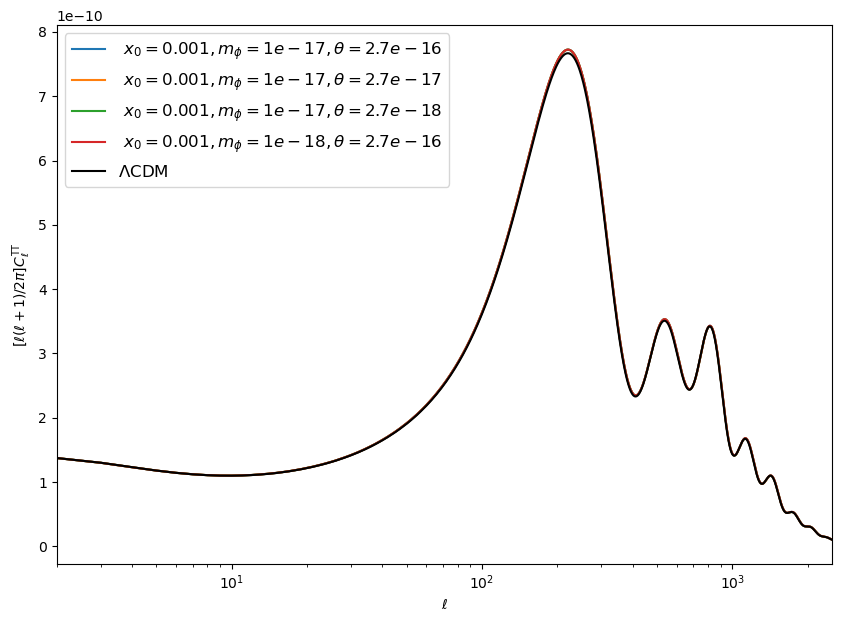

In [7]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations0[:4]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

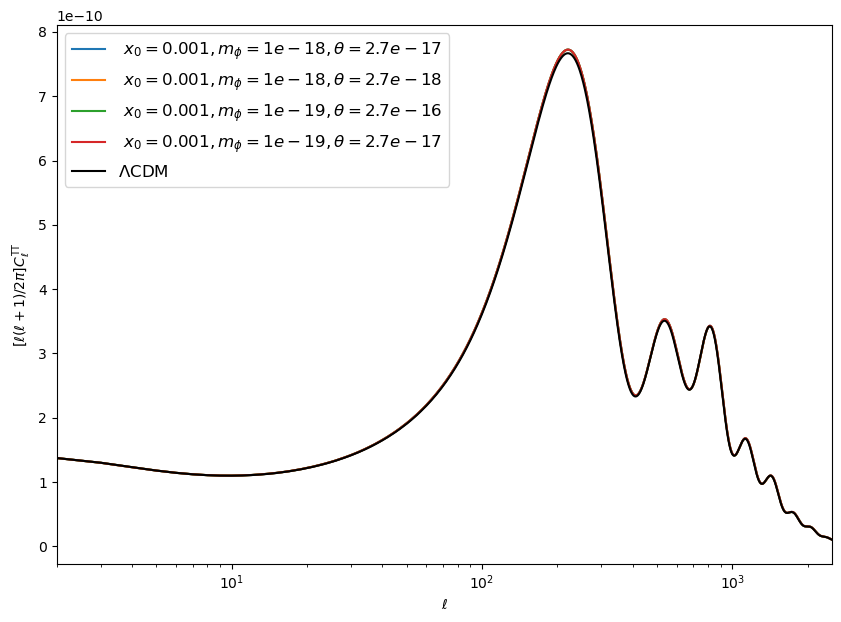

In [8]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations0[4:8]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

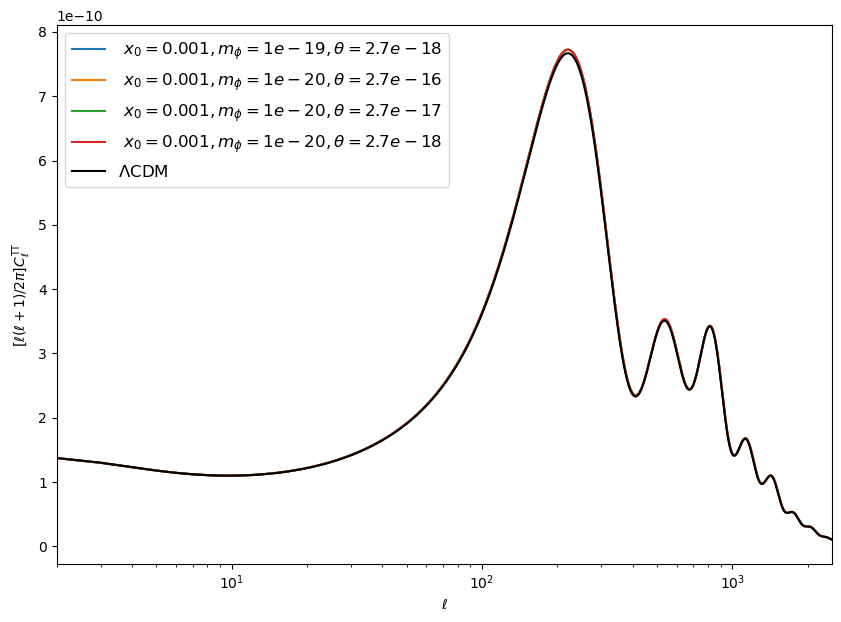

In [9]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations0[8:12]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

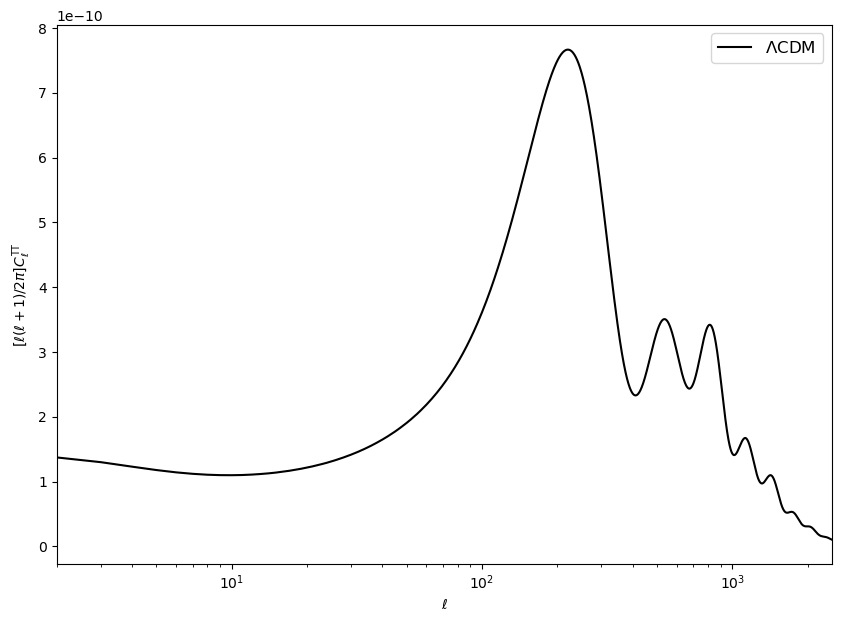

In [10]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations0[12:16]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

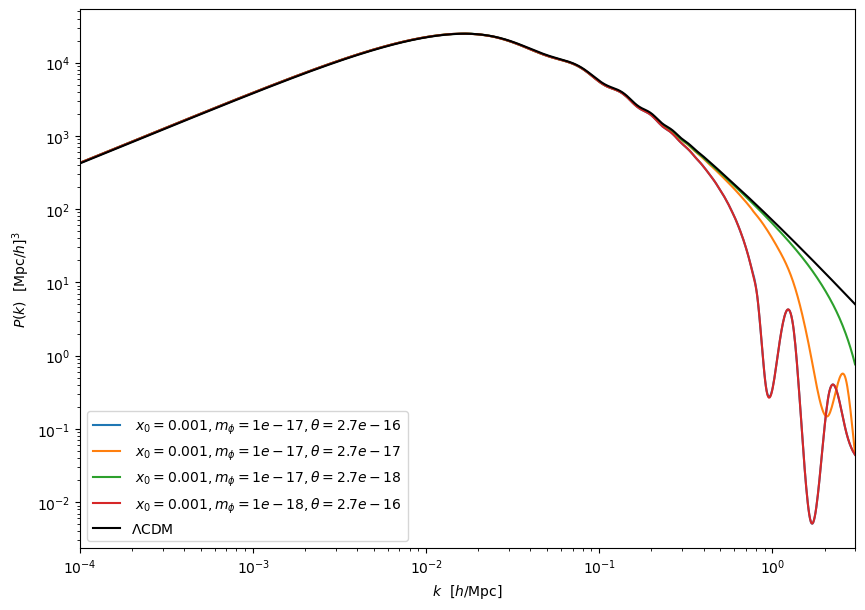

In [11]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations0[:4]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

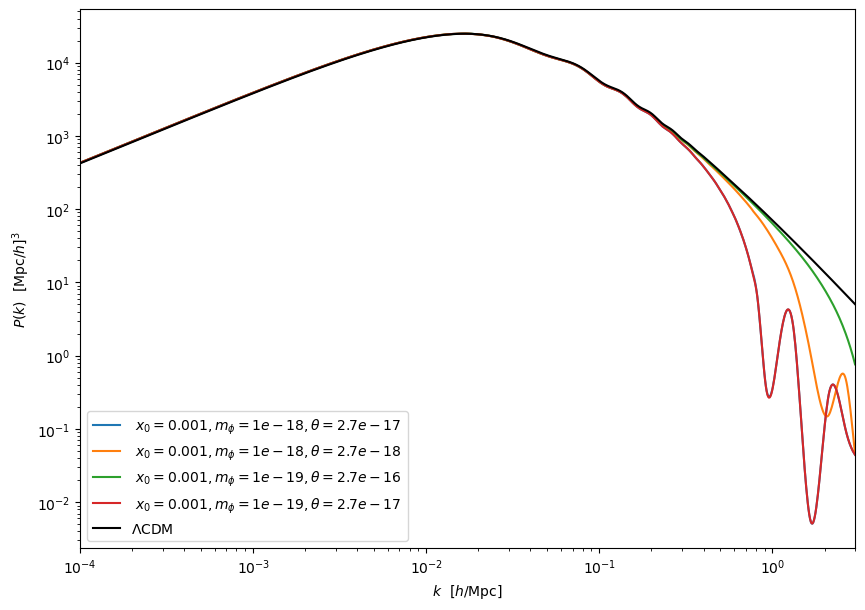

In [12]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations0[4:8]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

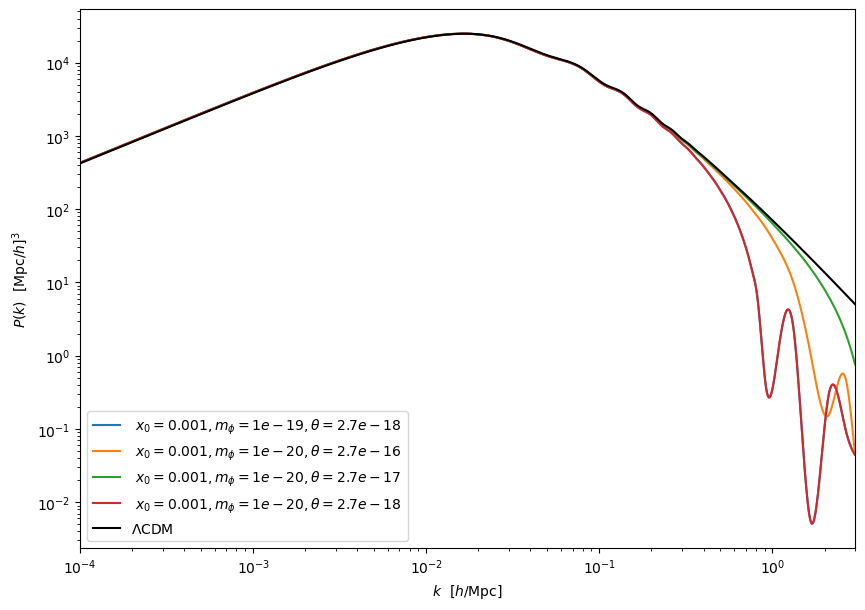

In [13]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations0[8:12]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

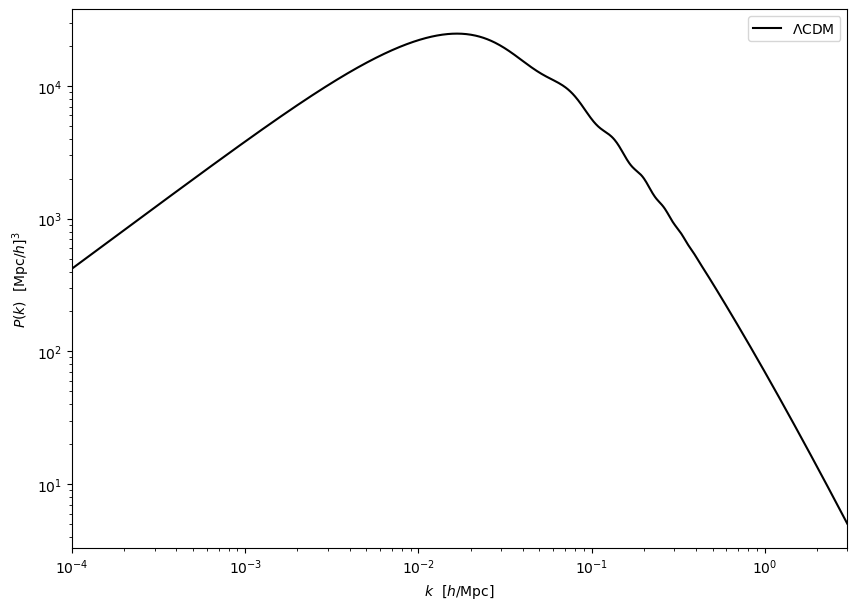

In [14]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations0[12:16]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [15]:
# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable1 = [1e-2]
m_variable1 = [1e-17,1e-18,1e-19,1e-20]
theta_variable1 = [2.7e-16, 2.7e-17, 2.7e-18]
#lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations1 = list(itertools.product(x_variable1, m_variable1, theta_variable1))

# Background
z_all1 = []
a_all1 = []
Omega_rad_all1 = []
Omega_bar_all1 = []
Omega_lambda_all1 = []
Omega_sch_all1 = []
w_sch_all1 = []
rho_rel_all1 = []

# Listas para perturbaciones lineales
clTT_all1 = []
clEE_all1 = []
clPP_all1 = []
Pk_all1 = []
ll_all1 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, m, th in combinations1:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['m_phi_schm'] = m       # Actualizar el valor de V0_schm
    common_settings0['theta_schm'] = th  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x},mphi={m}, theta = {th}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all1.append(z)
    a_all1.append(a)
    Omega_rad_all1.append(Omega_rad)
    Omega_bar_all1.append(Omega_bar)
    Omega_lambda_all1.append(Omega_lambda)
    Omega_sch_all1.append(Omega_sch)
    w_sch_all1.append(w_sch)
    rho_rel_all1.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all1.append(clTT)
    clEE_all1.append(clEE)
    clPP_all1.append(clPP)
    ll_all1.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all1.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, mphi={m}, theta = {th}")
    

# Graficar los resultados
print("cálculos terminados")


iniciando cálculos con la combinación: x0=0.01,mphi=1e-17, theta = 2.7e-16
El cálculo se ha completado con la combinación x0=0.01, mphi=1e-17, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.01,mphi=1e-17, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08005
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.08005
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08005
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.08005
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-17, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.01,mphi=1e-17, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-17, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.01,mphi=1e-18, theta = 2.7e-16
El cálculo se ha completado con la combinación x0=0.01, mphi=1e-18, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.01,mphi=1e-18, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=0.01, mphi=1e-18, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.01,mphi=1e-18, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-18, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.01,mphi=1e-19, theta = 2.7e-16


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-19, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.01,mphi=1e-19, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=0.01, mphi=1e-19, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.01,mphi=1e-19, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-19, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.01,mphi=1e-20, theta = 2.7e-16


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-20, theta = 2.7e-16
iniciando cálculos con la combinación: x0=0.01,mphi=1e-20, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01, mphi=1e-20, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.01,mphi=1e-20, theta = 2.7e-18
El cálculo se ha completado con la combinación x0=0.01, mphi=1e-20, theta = 2.7e-18
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


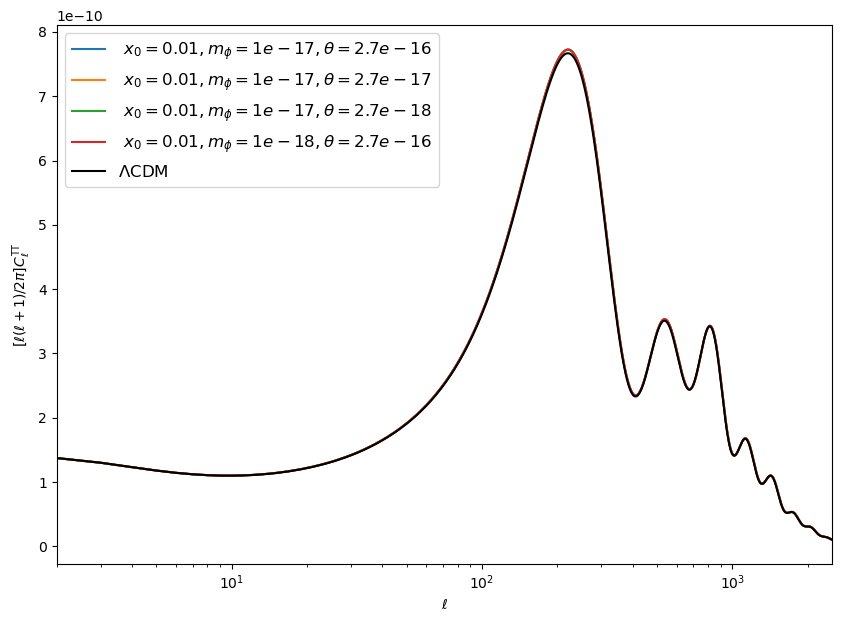

In [16]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations1[:4]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

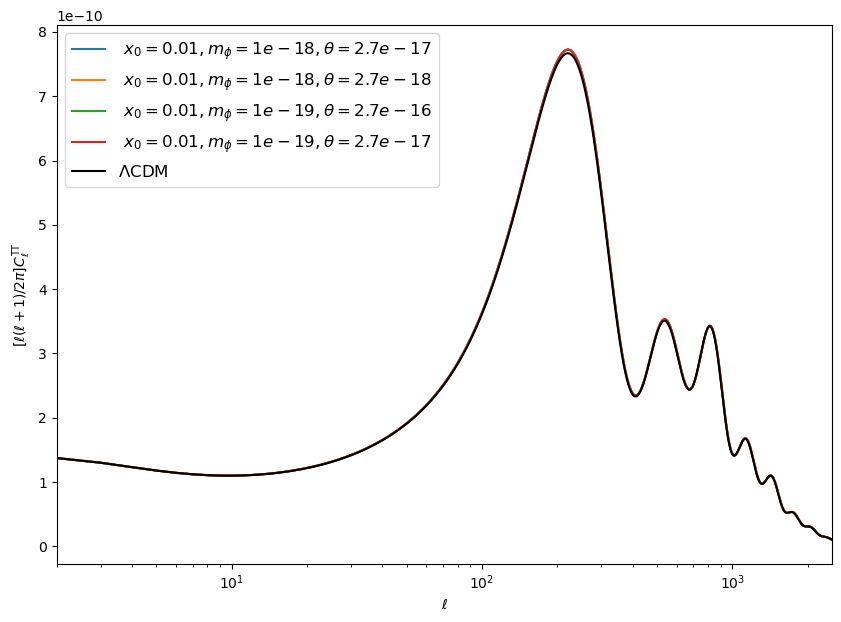

In [17]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations1[4:8]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

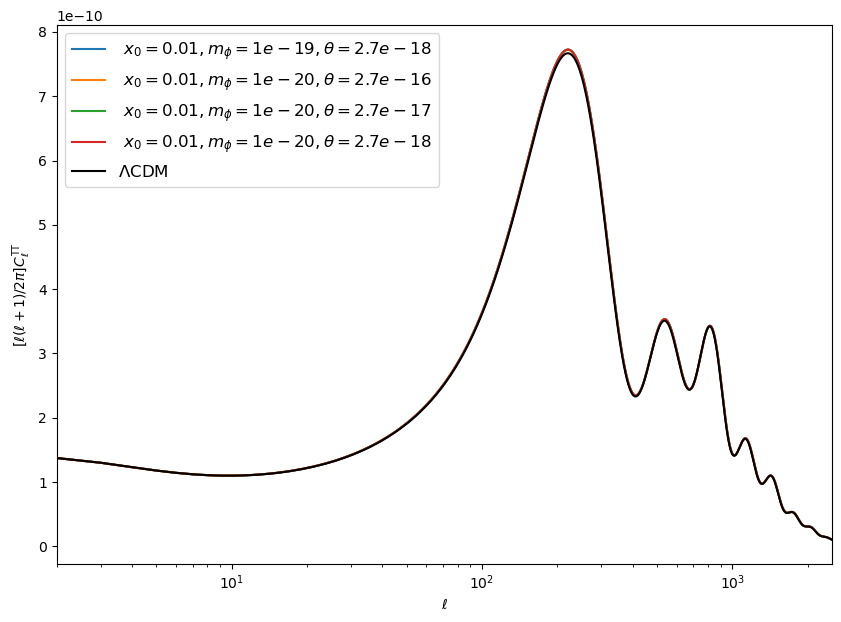

In [18]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations1[8:12]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

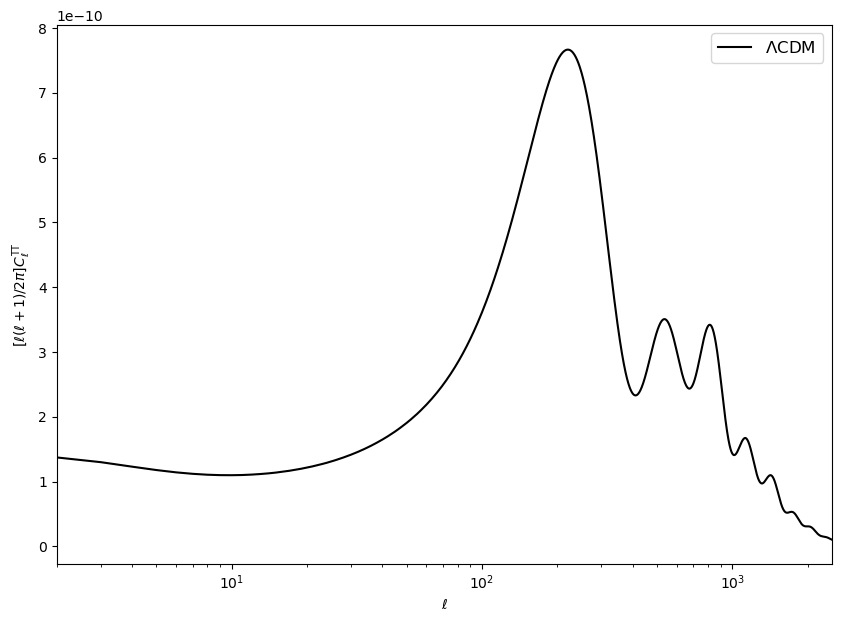

In [19]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations1[12:16]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

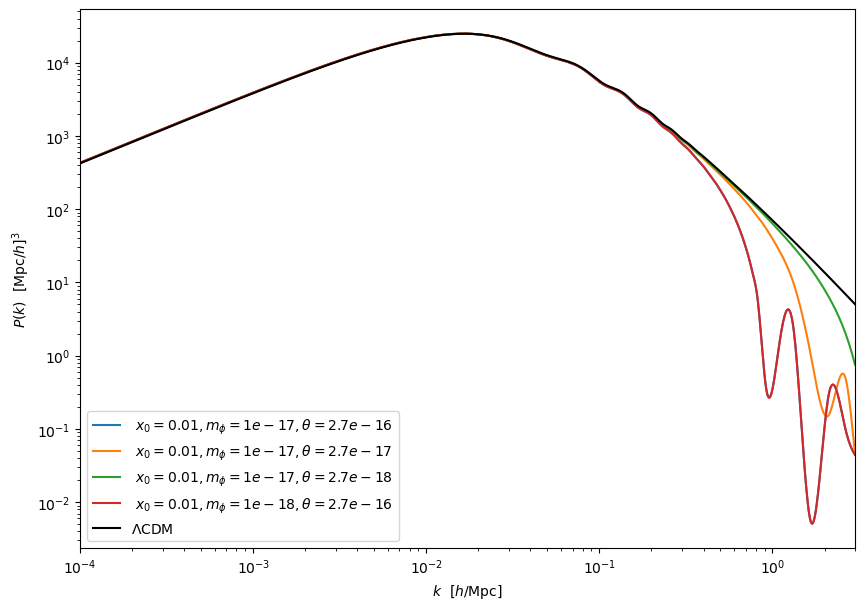

In [20]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations1[:4]):
    plt.plot(kk,Pk_all1[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

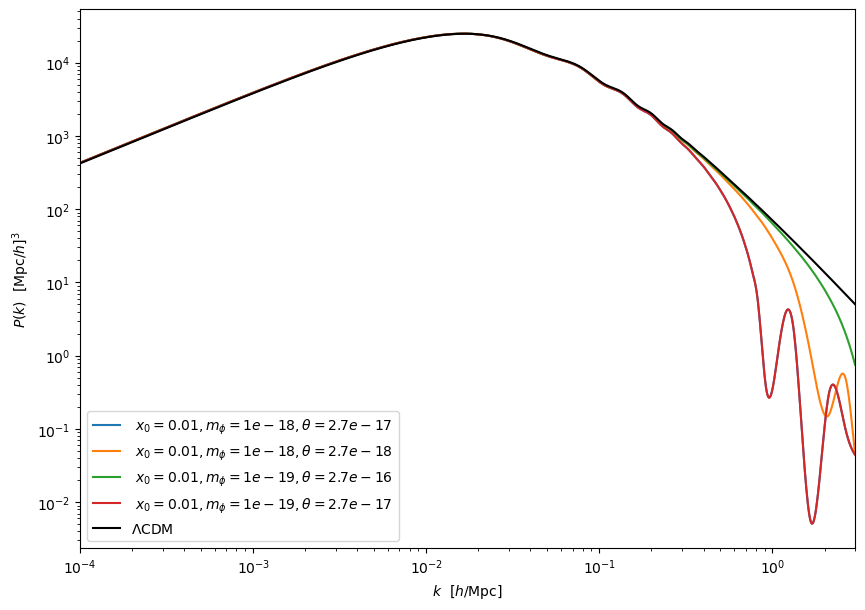

In [21]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations1[4:8]):
    plt.plot(kk,Pk_all1[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

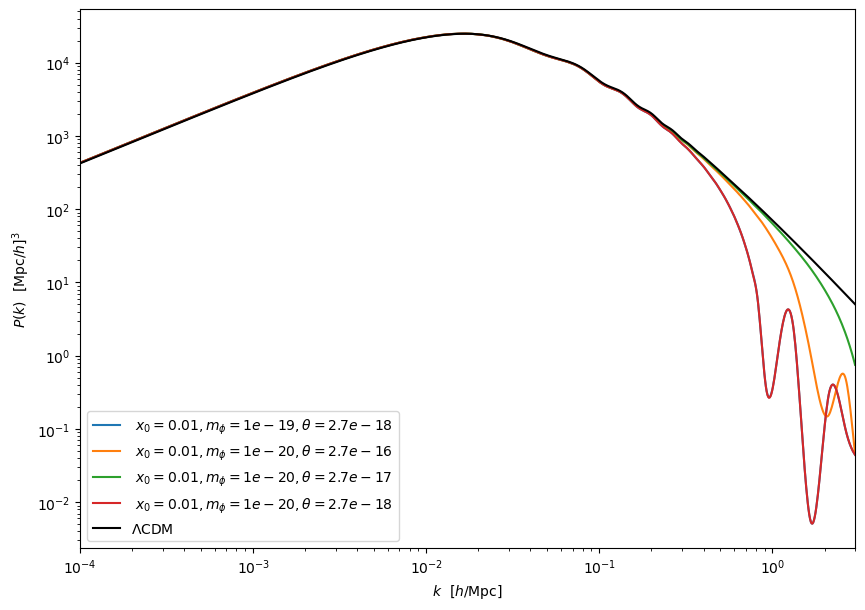

In [22]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations1[8:12]):
    plt.plot(kk,Pk_all1[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [23]:
# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable2 = [1e-1]
m_variable2 = [1e-17,1e-18,1e-19,1e-20]
theta_variable2 = [2.7e-17, 2.7e-18, 2.7e-19]
#lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations2 = list(itertools.product(x_variable2, m_variable2, theta_variable2))

# Background
z_all2 = []
a_all2 = []
Omega_rad_all2 = []
Omega_bar_all2 = []
Omega_lambda_all2 = []
Omega_sch_all2 = []
w_sch_all2 = []
rho_rel_all2 = []

# Listas para perturbaciones lineales
clTT_all2 = []
clEE_all2 = []
clPP_all2 = []
Pk_all2 = []
ll_all2 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, m, th in combinations2:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['m_phi_schm'] = m       # Actualizar el valor de V0_schm
    common_settings0['theta_schm'] = th  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x}, mphi={m}, theta = {th}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all2.append(z)
    a_all2.append(a)
    Omega_rad_all2.append(Omega_rad)
    Omega_bar_all2.append(Omega_bar)
    Omega_lambda_all2.append(Omega_lambda)
    Omega_sch_all2.append(Omega_sch)
    w_sch_all2.append(w_sch)
    rho_rel_all2.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all2.append(clTT)
    clEE_all2.append(clEE)
    clPP_all2.append(clPP)
    ll_all2.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all2.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, mphi={m}, theta = {th}")
    

# Graficar los resultados
print("cálculos terminados")


iniciando cálculos con la combinación: x0=0.1, mphi=1e-17, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=0.1, mphi=1e-17, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.1, mphi=1e-17, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.08018
aquí voy y todo bien 2.07981
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-17, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.1, mphi=1e-17, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=0.1, mphi=1e-17, theta = 2.7e-19
iniciando cálculos con la combinación: x0=0.1, mphi=1e-18, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08005
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.08005


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-18, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.1, mphi=1e-18, theta = 2.7e-18
El cálculo se ha completado con la combinación x0=0.1, mphi=1e-18, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.1, mphi=1e-18, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-18, theta = 2.7e-19
iniciando cálculos con la combinación: x0=0.1, mphi=1e-19, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-19, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.1, mphi=1e-19, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-19, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.1, mphi=1e-19, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-19, theta = 2.7e-19
iniciando cálculos con la combinación: x0=0.1, mphi=1e-20, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=0.1, mphi=1e-20, theta = 2.7e-17
iniciando cálculos con la combinación: x0=0.1, mphi=1e-20, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=0.1, mphi=1e-20, theta = 2.7e-18
iniciando cálculos con la combinación: x0=0.1, mphi=1e-20, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=0.1, mphi=1e-20, theta = 2.7e-19
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


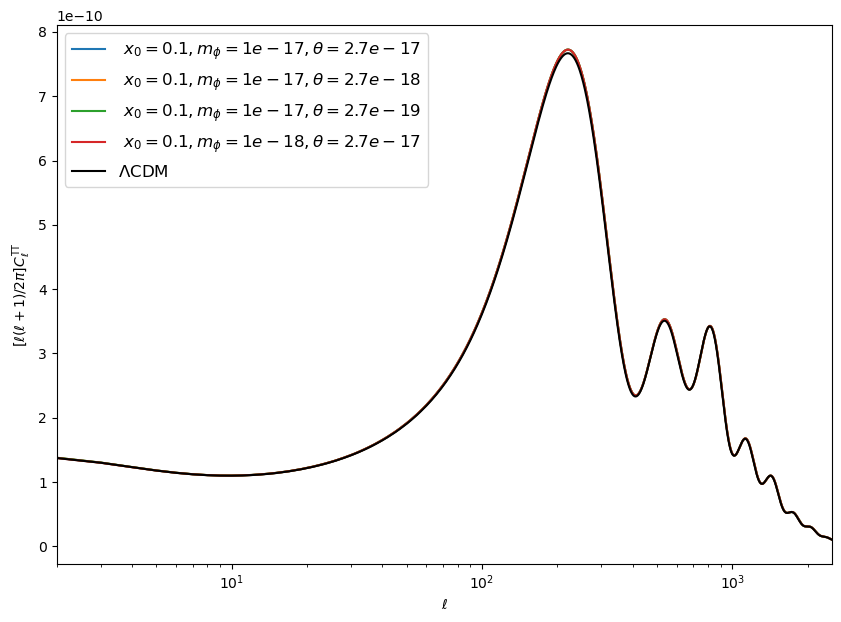

In [24]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations2[:4]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

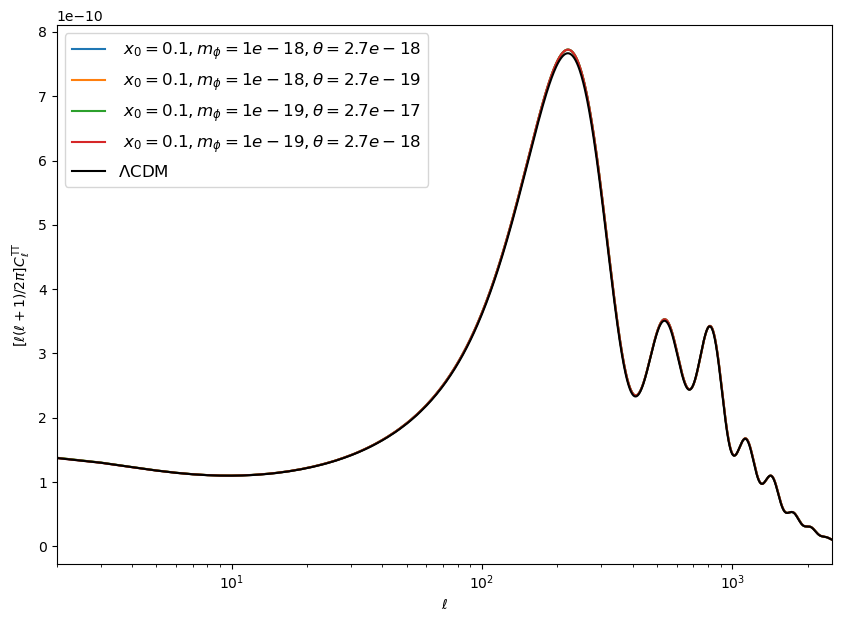

In [25]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations2[4:8]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

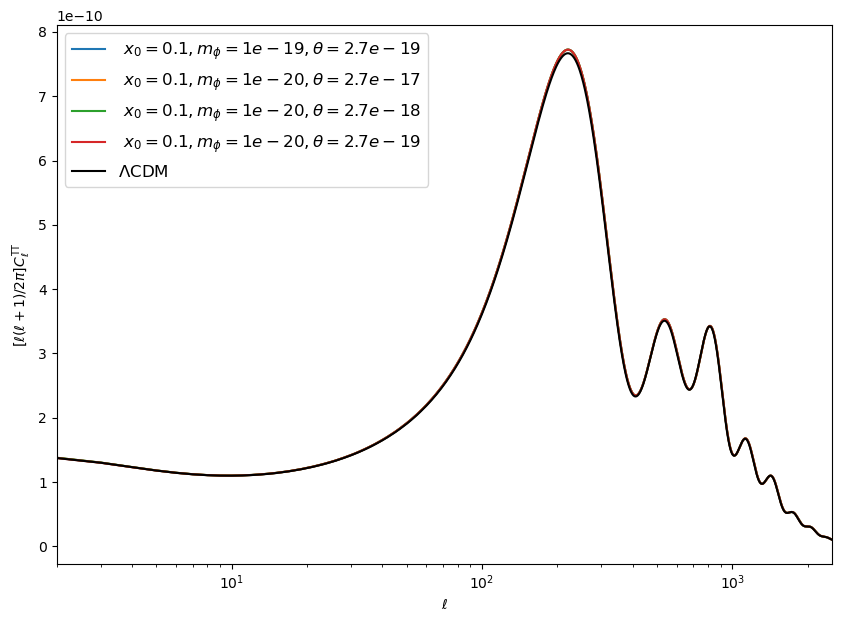

In [26]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations2[8:12]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

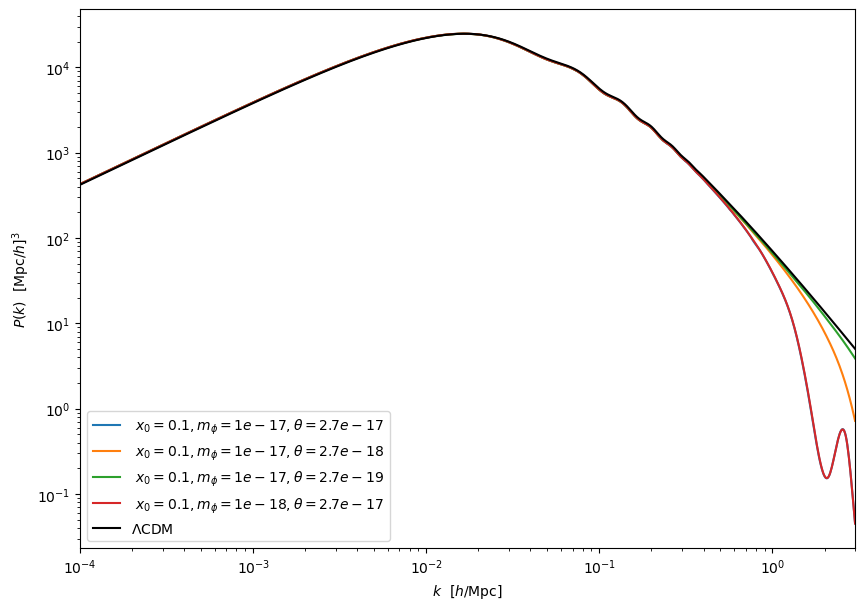

In [27]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations2[:4]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

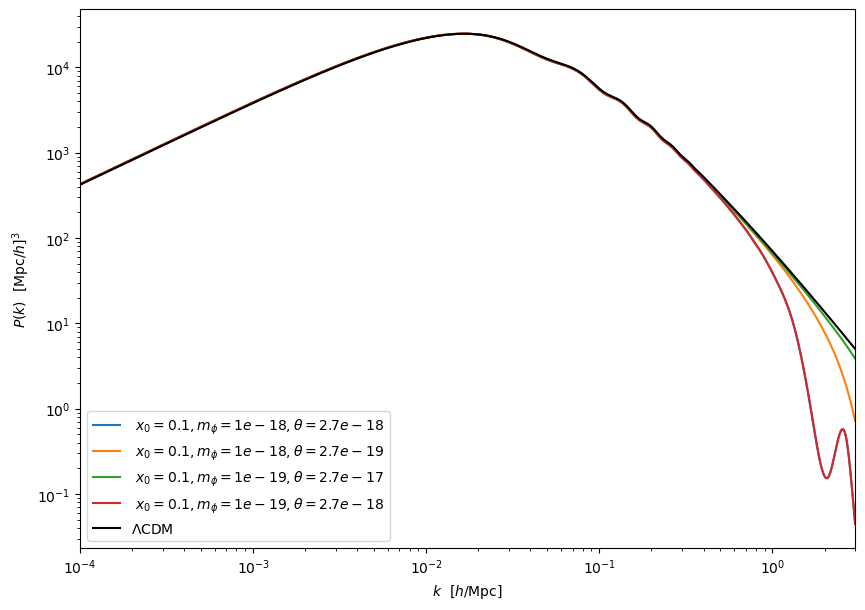

In [28]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations2[4:8]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

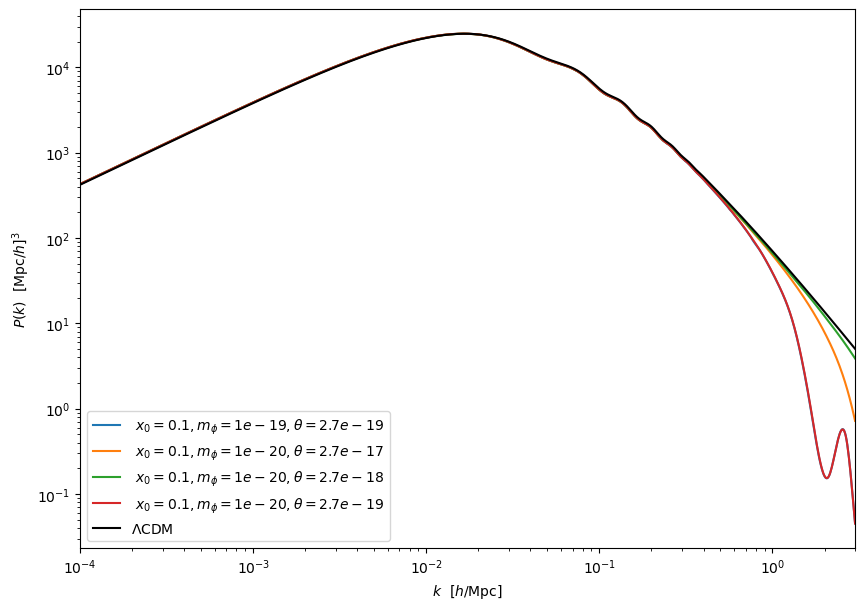

In [29]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations2[8:12]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [30]:
# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable3 = [1]
#m_variable3 = [1e-16,1e-17,1e-18,1e-19]
#theta_variable3 = [2.7e-15, 2.7e-16, 2.7e-17, 2.7e-18]
#lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations3 = list(itertools.product(x_variable3, m_variable2, theta_variable2))

# Background
z_all3 = []
a_all3 = []
Omega_rad_all3 = []
Omega_bar_all3 = []
Omega_lambda_all3 = []
Omega_sch_all3 = []
w_sch_all3 = []
rho_rel_all3 = []

# Listas para perturbaciones lineales
clTT_all3 = []
clEE_all3 = []
clPP_all3 = []
Pk_all3 = []
ll_all3 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, m, th in combinations3:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['m_phi_schm'] = m       # Actualizar el valor de V0_schm
    common_settings0['theta_schm'] = th  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x}, mphi={m}, theta = {th}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all3.append(z)
    a_all3.append(a)
    Omega_rad_all3.append(Omega_rad)
    Omega_bar_all3.append(Omega_bar)
    Omega_lambda_all3.append(Omega_lambda)
    Omega_sch_all3.append(Omega_sch)
    w_sch_all3.append(w_sch)
    rho_rel_all3.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all3.append(clTT)
    clEE_all3.append(clEE)
    clPP_all3.append(clPP)
    ll_all3.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all3.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, mphi={m}, theta = {th}")
    

# Graficar los resultados
print("cálculos terminados")


iniciando cálculos con la combinación: x0=1, mphi=1e-17, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=1, mphi=1e-17, theta = 2.7e-17
iniciando cálculos con la combinación: x0=1, mphi=1e-17, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733


El cálculo se ha completado con la combinación x0=1, mphi=1e-17, theta = 2.7e-18
iniciando cálculos con la combinación: x0=1, mphi=1e-17, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733


El cálculo se ha completado con la combinación x0=1, mphi=1e-17, theta = 2.7e-19
iniciando cálculos con la combinación: x0=1, mphi=1e-18, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.08018
aquí voy y todo bien 2.07981


El cálculo se ha completado con la combinación x0=1, mphi=1e-18, theta = 2.7e-17
iniciando cálculos con la combinación: x0=1, mphi=1e-18, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981


El cálculo se ha completado con la combinación x0=1, mphi=1e-18, theta = 2.7e-18
iniciando cálculos con la combinación: x0=1, mphi=1e-18, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=1, mphi=1e-18, theta = 2.7e-19
iniciando cálculos con la combinación: x0=1, mphi=1e-19, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08005
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.08005


El cálculo se ha completado con la combinación x0=1, mphi=1e-19, theta = 2.7e-17
iniciando cálculos con la combinación: x0=1, mphi=1e-19, theta = 2.7e-18
El cálculo se ha completado con la combinación x0=1, mphi=1e-19, theta = 2.7e-18
iniciando cálculos con la combinación: x0=1, mphi=1e-19, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006


El cálculo se ha completado con la combinación x0=1, mphi=1e-19, theta = 2.7e-19
iniciando cálculos con la combinación: x0=1, mphi=1e-20, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=1, mphi=1e-20, theta = 2.7e-17
iniciando cálculos con la combinación: x0=1, mphi=1e-20, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=1, mphi=1e-20, theta = 2.7e-18
iniciando cálculos con la combinación: x0=1, mphi=1e-20, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=1, mphi=1e-20, theta = 2.7e-19
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1.26129
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008


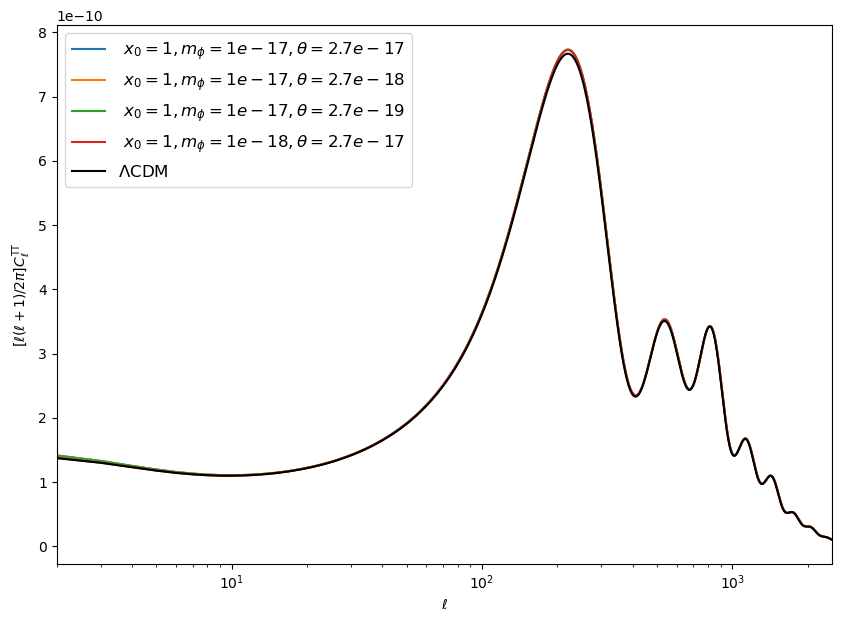

In [31]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations3[:4]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

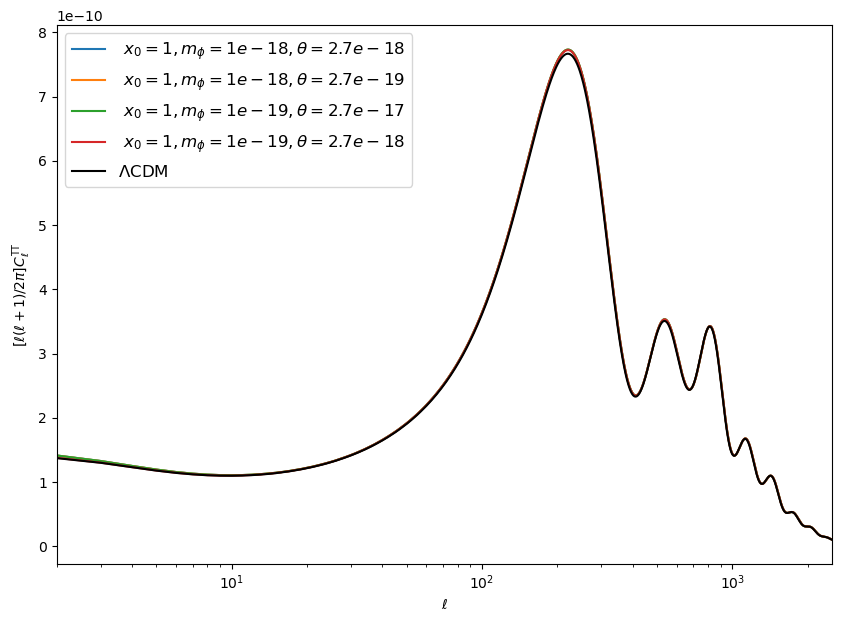

In [32]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations3[4:8]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

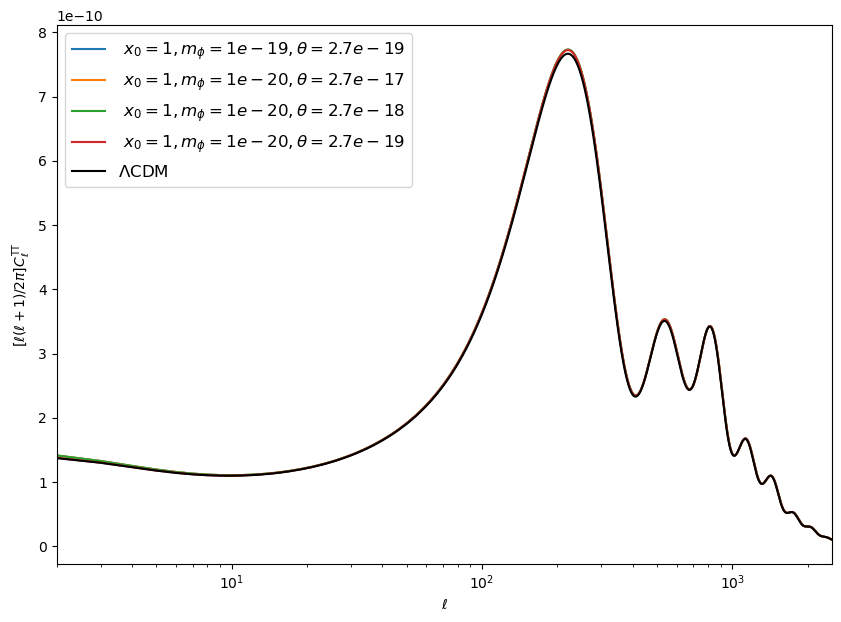

In [33]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations3[8:12]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

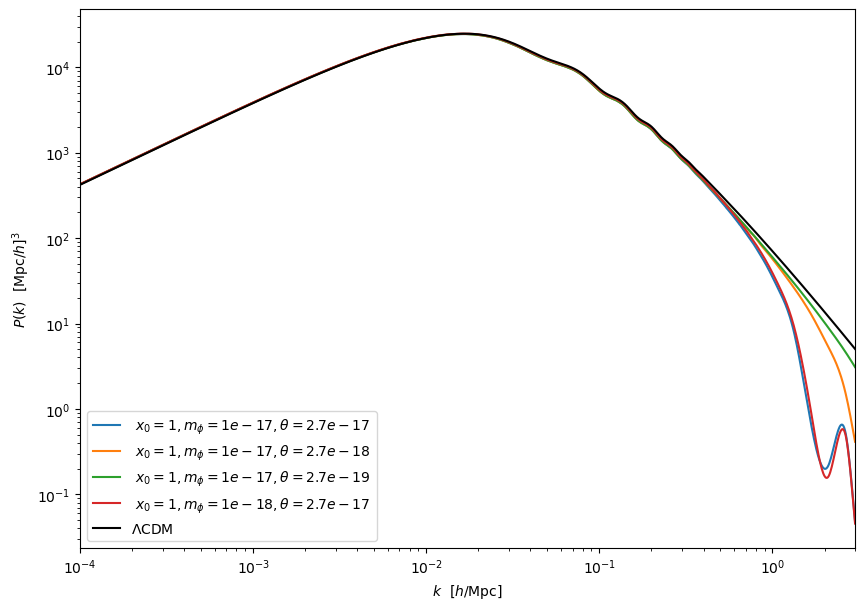

In [34]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations3[:4]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

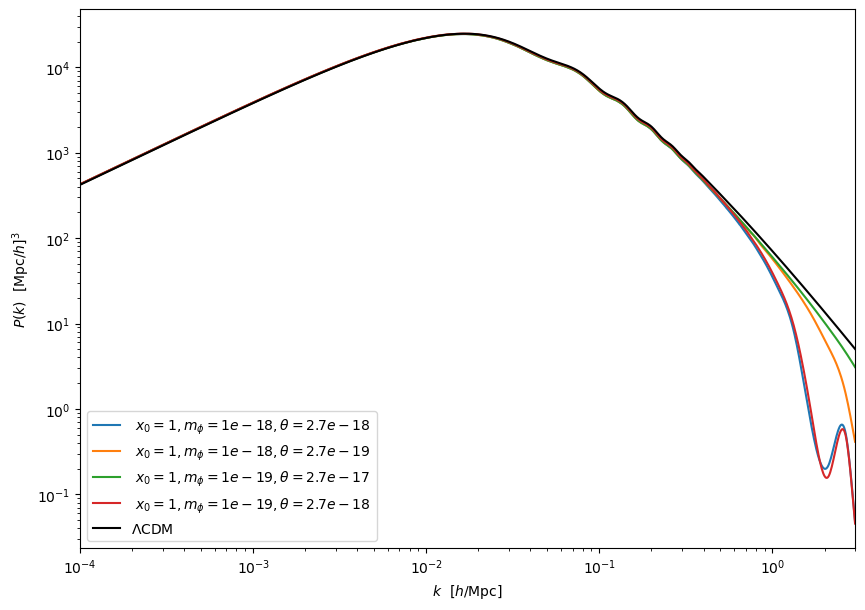

In [35]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations3[4:8]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

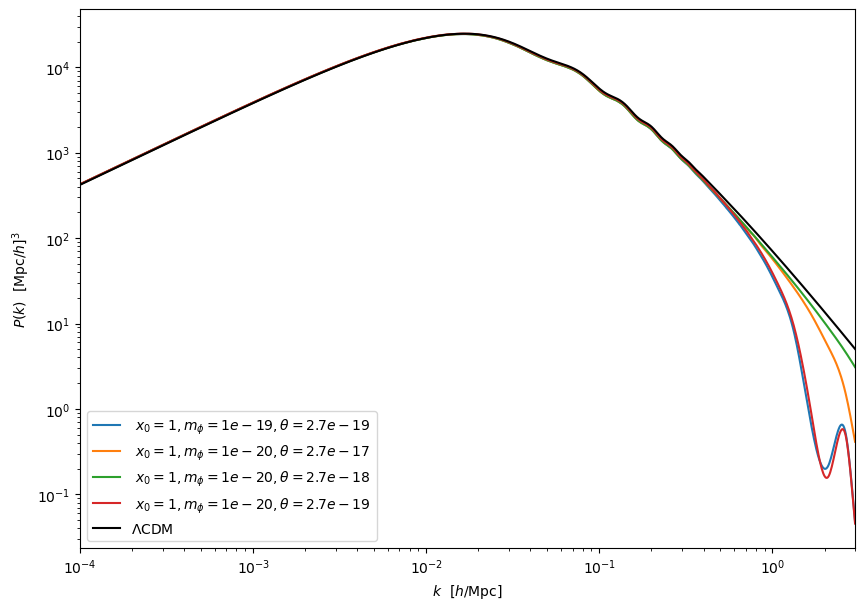

In [36]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations3[8:12]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

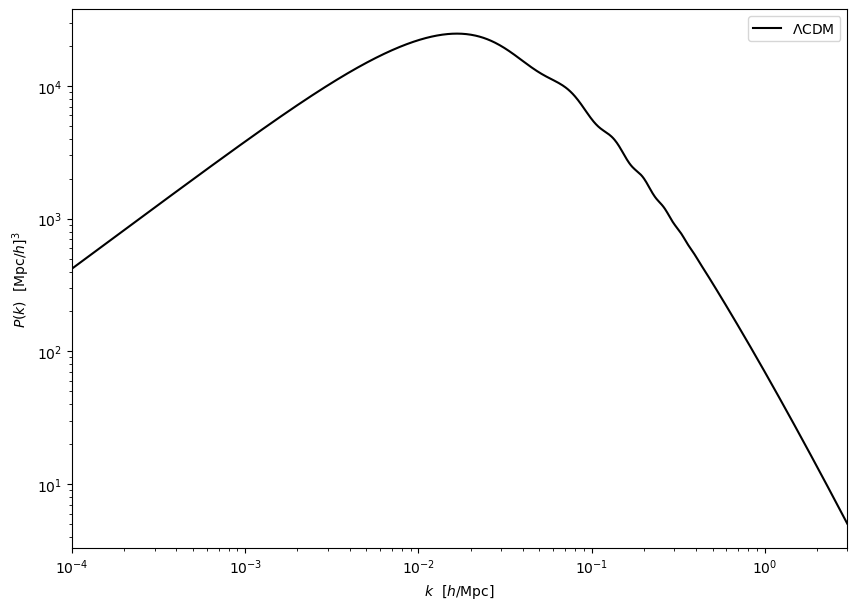

In [37]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations3[12:16]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [38]:
# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable4 = [10]
#m_variable3 = [1e-16,1e-17,1e-18,1e-19]
#theta_variable3 = [2.7e-15, 2.7e-16, 2.7e-17, 2.7e-18]
#lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations4 = list(itertools.product(x_variable4, m_variable2, theta_variable2))

# Background
z_all4 = []
a_all4 = []
Omega_rad_all4 = []
Omega_bar_all4 = []
Omega_lambda_all4 = []
Omega_sch_all4 = []
w_sch_all4 = []
rho_rel_all4 = []

# Listas para perturbaciones lineales
clTT_all4 = []
clEE_all4 = []
clPP_all4 = []
Pk_all4 = []
ll_all4 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, m, th in combinations4:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['m_phi_schm'] = m       # Actualizar el valor de V0_schm
    common_settings0['theta_schm'] = th  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x}, mphi={m}, theta = {th}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all4.append(z)
    a_all4.append(a)
    Omega_rad_all4.append(Omega_rad)
    Omega_bar_all4.append(Omega_bar)
    Omega_lambda_all4.append(Omega_lambda)
    Omega_sch_all4.append(Omega_sch)
    w_sch_all4.append(w_sch)
    rho_rel_all4.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all4.append(clTT)
    clEE_all4.append(clEE)
    clPP_all4.append(clPP)
    ll_all4.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all4.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, mphi={m}, theta = {th}")
    

# Graficar los resultados
print("cálculos terminados")


iniciando cálculos con la combinación: x0=10, mphi=1e-17, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=10, mphi=1e-17, theta = 2.7e-17
iniciando cálculos con la combinación: x0=10, mphi=1e-17, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.24916
aquí voy y todo bien 2.72025
aquí voy y todo bien 1.9847
aquí voy y todo bien 2.05292
aquí voy y todo bien 2.01882
aquí voy y todo bien 2.05219
aquí voy y todo bien 2.05256
aquí voy y todo bien 2.05219
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.24916
aquí voy y todo bien 2.72025
aquí voy y todo bien 1.9847
aquí voy y todo bien 2.05292
aquí voy y todo bien 2.01882
aquí voy y todo bien 2.05219
aquí voy y todo bien 2.05256
aquí voy y todo bien 2.05219


El cálculo se ha completado con la combinación x0=10, mphi=1e-17, theta = 2.7e-18
iniciando cálculos con la combinación: x0=10, mphi=1e-17, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.24916
aquí voy y todo bien 2.72025
aquí voy y todo bien 1.9847
aquí voy y todo bien 2.05292
aquí voy y todo bien 2.01882
aquí voy y todo bien 2.05219
aquí voy y todo bien 2.05256
aquí voy y todo bien 2.05219


El cálculo se ha completado con la combinación x0=10, mphi=1e-17, theta = 2.7e-19
iniciando cálculos con la combinación: x0=10, mphi=1e-18, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=10, mphi=1e-18, theta = 2.7e-17
iniciando cálculos con la combinación: x0=10, mphi=1e-18, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733


El cálculo se ha completado con la combinación x0=10, mphi=1e-18, theta = 2.7e-18
iniciando cálculos con la combinación: x0=10, mphi=1e-18, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=10, mphi=1e-18, theta = 2.7e-19
iniciando cálculos con la combinación: x0=10, mphi=1e-19, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.08018
aquí voy y todo bien 2.07981


El cálculo se ha completado con la combinación x0=10, mphi=1e-19, theta = 2.7e-17
iniciando cálculos con la combinación: x0=10, mphi=1e-19, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981
aquí voy y todo bien 1
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=10, mphi=1e-19, theta = 2.7e-18
iniciando cálculos con la combinación: x0=10, mphi=1e-19, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=10, mphi=1e-19, theta = 2.7e-19
iniciando cálculos con la combinación: x0=10, mphi=1e-20, theta = 2.7e-17


aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08005
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.08005


El cálculo se ha completado con la combinación x0=10, mphi=1e-20, theta = 2.7e-17
iniciando cálculos con la combinación: x0=10, mphi=1e-20, theta = 2.7e-18
El cálculo se ha completado con la combinación x0=10, mphi=1e-20, theta = 2.7e-18
iniciando cálculos con la combinación: x0=10, mphi=1e-20, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006


El cálculo se ha completado con la combinación x0=10, mphi=1e-20, theta = 2.7e-19
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26128
aquí voy y todo bien 2.75126
aquí voy y todo bien 2.00627
aquí voy y todo bien 2.0808
aquí voy y todo bien 2.04353
aquí voy y todo bien 2.08006
aquí voy y todo bien 2.06179
aquí voy y todo bien 2.08006


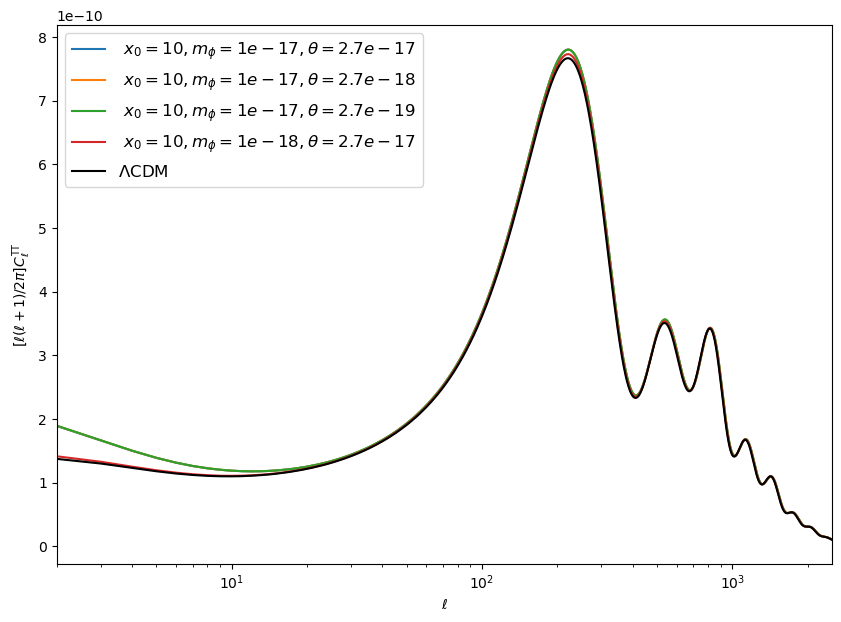

In [39]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations4[:4]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

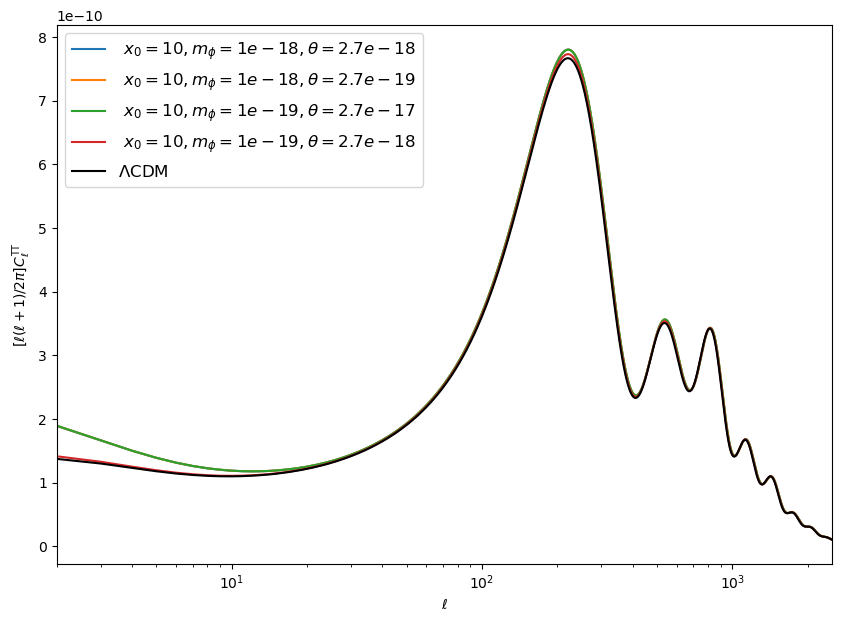

In [40]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations4[4:8]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

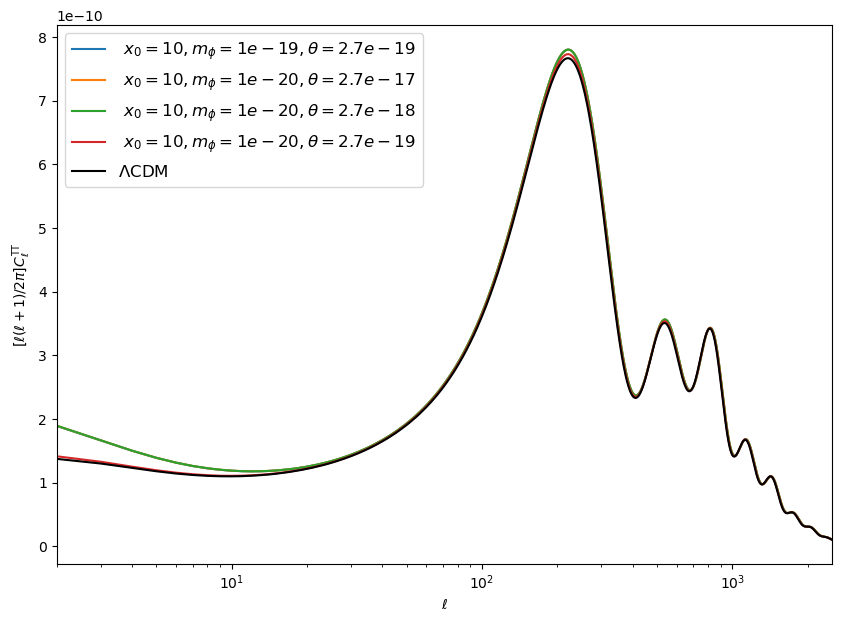

In [41]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations4[8:12]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

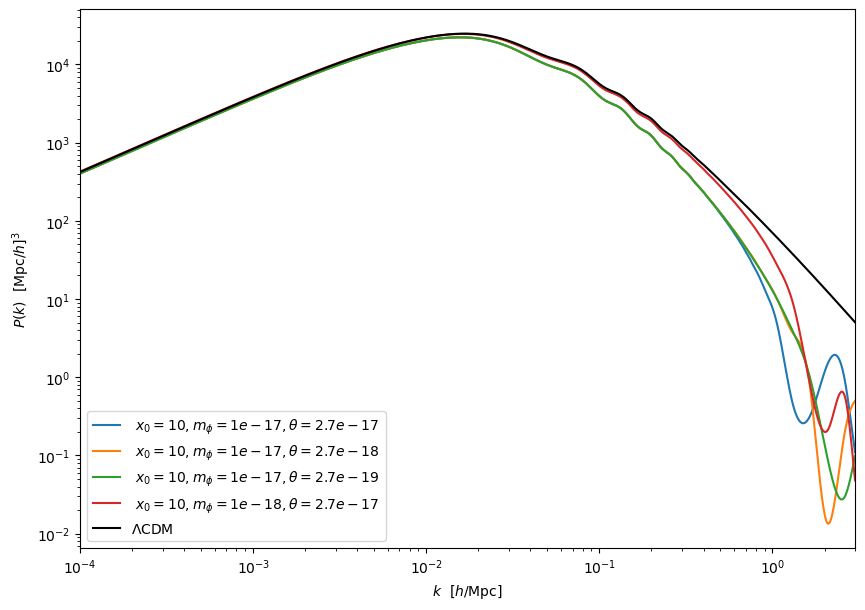

In [42]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations4[:4]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

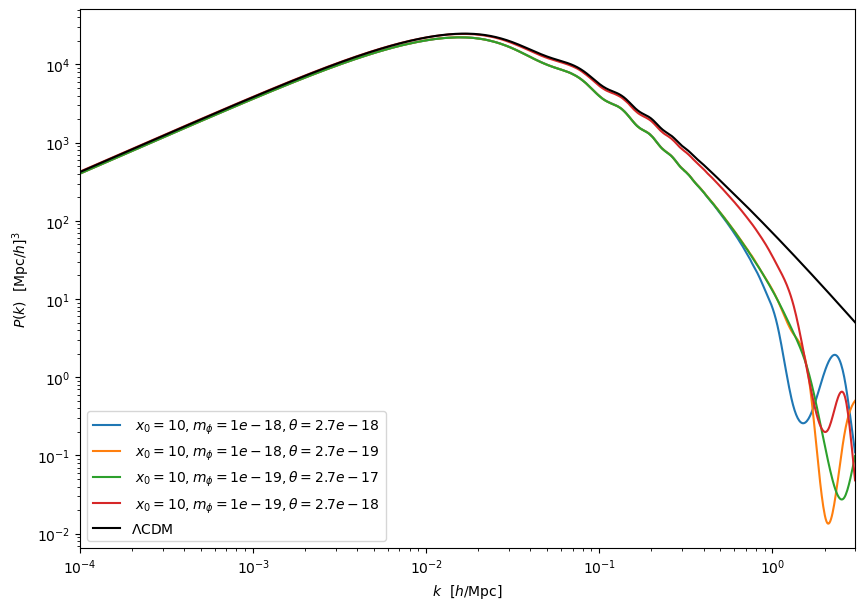

In [43]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations4[4:8]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

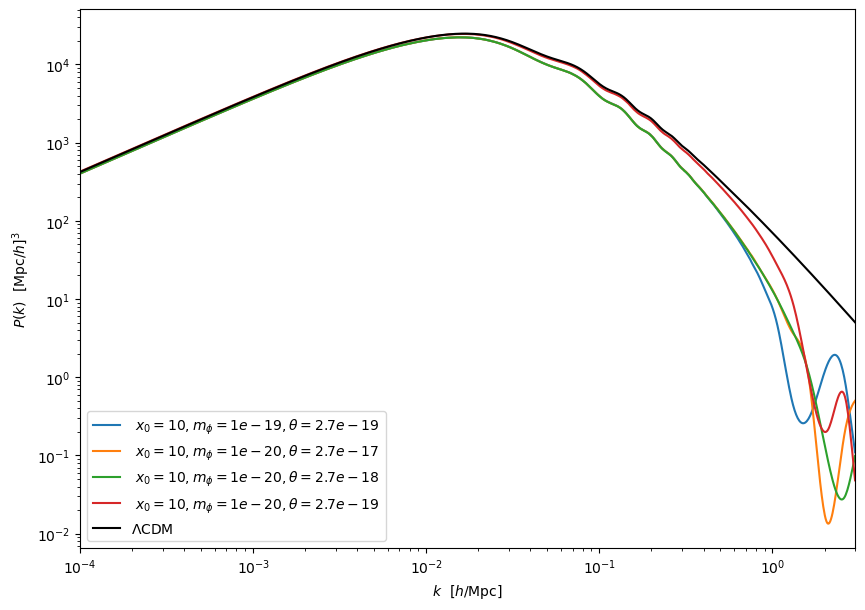

In [44]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations4[8:12]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

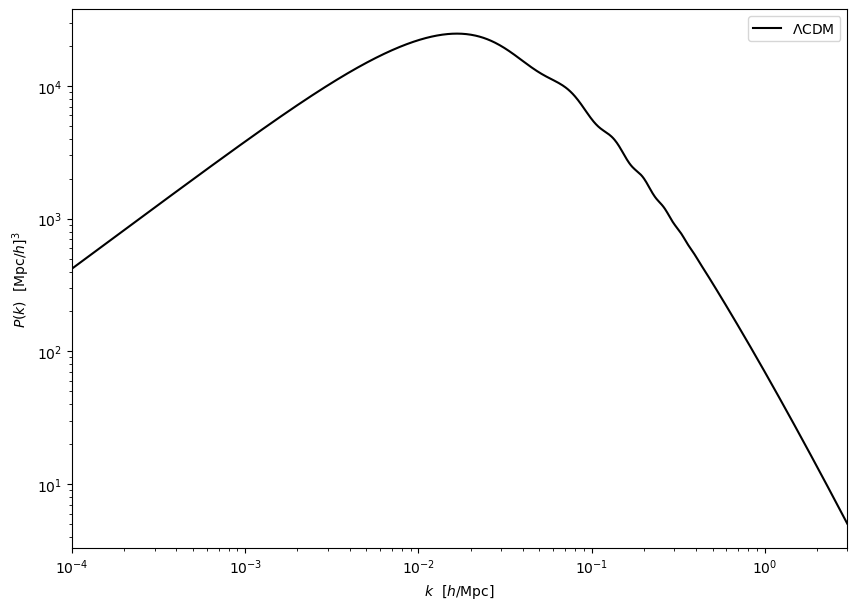

In [45]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations4[12:16]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [46]:
# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable5 = [100]
m_variable5 = [1e-17,1e-18,1e-19,1e-20]
#theta_variable3 = [2.7e-15, 2.7e-16, 2.7e-17, 2.7e-18]
#lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations5 = list(itertools.product(x_variable5, m_variable5, theta_variable2))

# Background
z_all5 = []
a_all5 = []
Omega_rad_all5 = []
Omega_bar_all5 = []
Omega_lambda_all5 = []
Omega_sch_all5 = []
w_sch_all5 = []
rho_rel_all5 = []

# Listas para perturbaciones lineales
clTT_all5 = []
clEE_all5 = []
clPP_all5 = []
Pk_all5 = []
ll_all5= []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, m, th in combinations5:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['m_phi_schm'] = m       # Actualizar el valor de V0_schm
    common_settings0['theta_schm'] = th  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x}, mphi={m}, theta = {th}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all5.append(z)
    a_all5.append(a)
    Omega_rad_all5.append(Omega_rad)
    Omega_bar_all5.append(Omega_bar)
    Omega_lambda_all5.append(Omega_lambda)
    Omega_sch_all5.append(Omega_sch)
    w_sch_all5.append(w_sch)
    rho_rel_all5.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all5.append(clTT)
    clEE_all5.append(clEE)
    clPP_all5.append(clPP)
    ll_all5.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all5.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, mphi={m}, theta = {th}")
    

# Graficar los resultados
print("cálculos terminados")


iniciando cálculos con la combinación: x0=100, mphi=1e-17, theta = 2.7e-17
El cálculo se ha completado con la combinación x0=100, mphi=1e-17, theta = 2.7e-17
iniciando cálculos con la combinación: x0=100, mphi=1e-17, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.14161
aquí voy y todo bien 2.33021
aquí voy y todo bien 1.73591
aquí voy y todo bien 1.75925
aquí voy y todo bien 1.74758
aquí voy y todo bien 1.75884
aquí voy y todo bien 1.75905
aquí voy y todo bien 1.75884
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.14161
aquí voy y todo bien 2.33021
aquí voy y todo bien 1.73591
aquí voy y todo bien 1.75925
aquí voy y todo bien 1.74758
aquí voy y todo bien 1.75884
aquí voy y todo bien 1.75905
aquí voy y todo bien 1.75884


El cálculo se ha completado con la combinación x0=100, mphi=1e-17, theta = 2.7e-18
iniciando cálculos con la combinación: x0=100, mphi=1e-17, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=100, mphi=1e-17, theta = 2.7e-19
iniciando cálculos con la combinación: x0=100, mphi=1e-18, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.14161
aquí voy y todo bien 2.33021
aquí voy y todo bien 1.73591
aquí voy y todo bien 1.75925
aquí voy y todo bien 1.74758
aquí voy y todo bien 1.75884
aquí voy y todo bien 1.75905
aquí voy y todo bien 1.75884
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.24916
aquí voy y todo bien 2.72025
aquí voy y todo bien 1.9847
aquí voy y todo bien 2.05292
aquí voy y todo bien 2.01882
aquí voy y todo bien 2.05219
aquí voy y todo bien 2.05256
aquí voy y todo bien 2.05219


El cálculo se ha completado con la combinación x0=100, mphi=1e-18, theta = 2.7e-17
iniciando cálculos con la combinación: x0=100, mphi=1e-18, theta = 2.7e-18
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26128, 2.75126].
Root has b

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.24916
aquí voy y todo bien 2.72025
aquí voy y todo bien 1.9847
aquí voy y todo bien 2.05292
aquí voy y todo bien 2.01882
aquí voy y todo bien 2.05219
aquí voy y todo bien 2.05256
aquí voy y todo bien 2.05219
aquí voy y todo bien 1


ns: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26117, 2.751].
Root has been bracketed after 2 iterations: [1.26117, 2.751].
Root has been bracketed after 2 iterations: [1.26117, 2.751].
Root has been bracketed after 2 iterations: [1.26128, 2.75126].
Root has been bracketed after 2 iterations: [1.26128, 2.75126].
Root has been bracketed after 2 iterations: [1.26128, 2.75126].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been brackete

aquí voy y todo bien 1
aquí voy y todo bien 1.24916
aquí voy y todo bien 2.72025
aquí voy y todo bien 1.9847
aquí voy y todo bien 2.05292
aquí voy y todo bien 2.01882
aquí voy y todo bien 2.05219
aquí voy y todo bien 2.05256
aquí voy y todo bien 2.05219
aquí voy y todo bien 1
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=100, mphi=1e-18, theta = 2.7e-19
iniciando cálculos con la combinación: x0=100, mphi=1e-19, theta = 2.7e-17


aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733


El cálculo se ha completado con la combinación x0=100, mphi=1e-19, theta = 2.7e-17
iniciando cálculos con la combinación: x0=100, mphi=1e-19, theta = 2.7e-18
El cálculo se ha completado con la combinación x0=100, mphi=1e-19, theta = 2.7e-18
iniciando cálculos con la combinación: x0=100, mphi=1e-19, theta = 2.7e-19


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26008
aquí voy y todo bien 2.74827
aquí voy y todo bien 2.00417
aquí voy y todo bien 2.07807
aquí voy y todo bien 2.04112
aquí voy y todo bien 2.07733
aquí voy y todo bien 2.05922
aquí voy y todo bien 2.07733
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=100, mphi=1e-19, theta = 2.7e-19
iniciando cálculos con la combinación: x0=100, mphi=1e-20, theta = 2.7e-17


aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.08018
aquí voy y todo bien 2.07981
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=100, mphi=1e-20, theta = 2.7e-17
iniciando cálculos con la combinación: x0=100, mphi=1e-20, theta = 2.7e-18


aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981


El cálculo se ha completado con la combinación x0=100, mphi=1e-20, theta = 2.7e-18
iniciando cálculos con la combinación: x0=100, mphi=1e-20, theta = 2.7e-19
El cálculo se ha completado con la combinación x0=100, mphi=1e-20, theta = 2.7e-19
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26117
aquí voy y todo bien 2.751
aquí voy y todo bien 2.00608
aquí voy y todo bien 2.08055
aquí voy y todo bien 2.04332
aquí voy y todo bien 2.07981
aquí voy y todo bien 2.06156
aquí voy y todo bien 2.07981


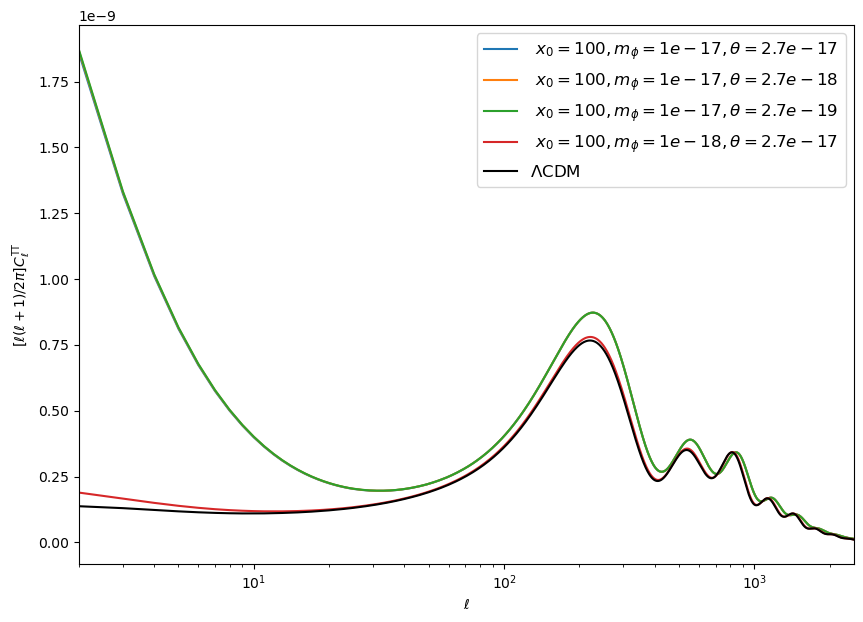

In [47]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations5[:4]):
    plt.plot(ll_all5[i], clTT_all5[i]*ll_all5[i]*(ll_all5[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

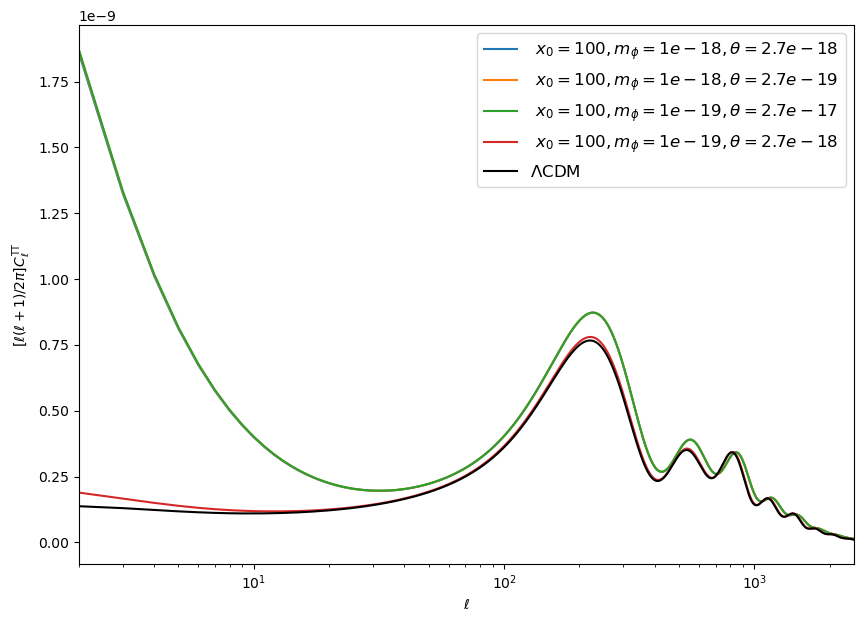

In [48]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations5[4:8]):
    plt.plot(ll_all5[i], clTT_all5[i]*ll_all5[i]*(ll_all5[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

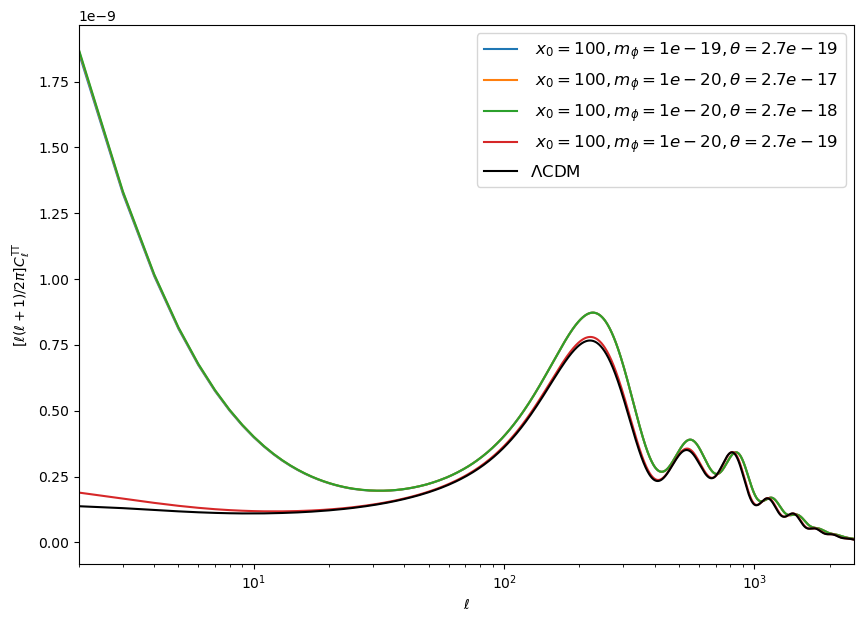

In [49]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, m, th) in enumerate(combinations5[8:12]):
    plt.plot(ll_all5[i], clTT_all5[i]*ll_all5[i]*(ll_all5[i]+1)/2./pi, label=f" $x_0 = {x}, m_\phi = {m}, \\theta = {th}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

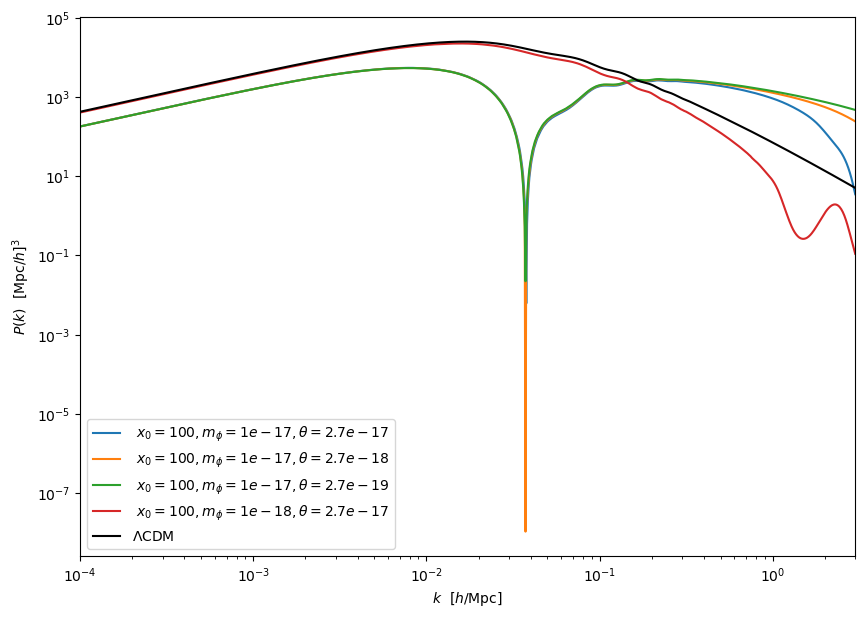

In [50]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations5[:4]):
    plt.plot(kk,Pk_all5[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

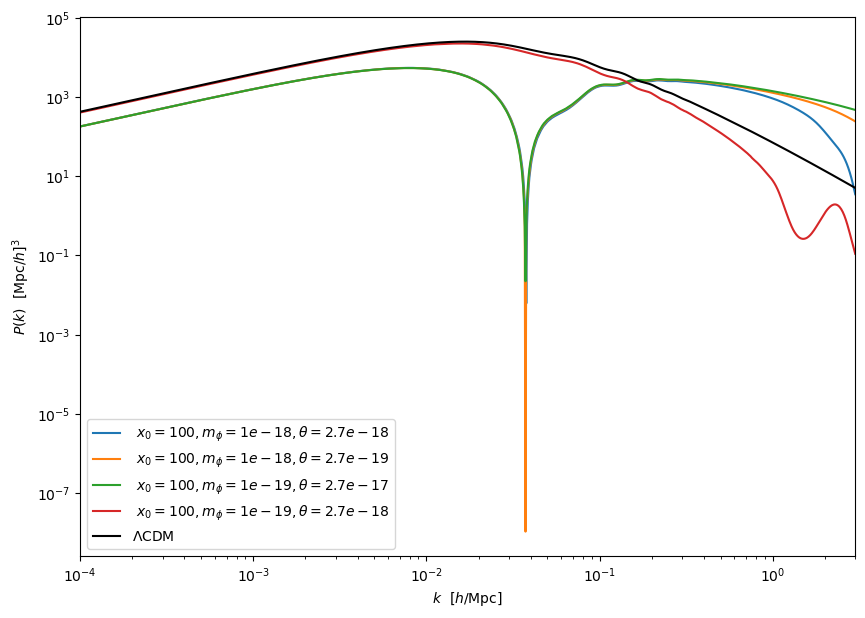

In [51]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations5[4:8]):
    plt.plot(kk,Pk_all5[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

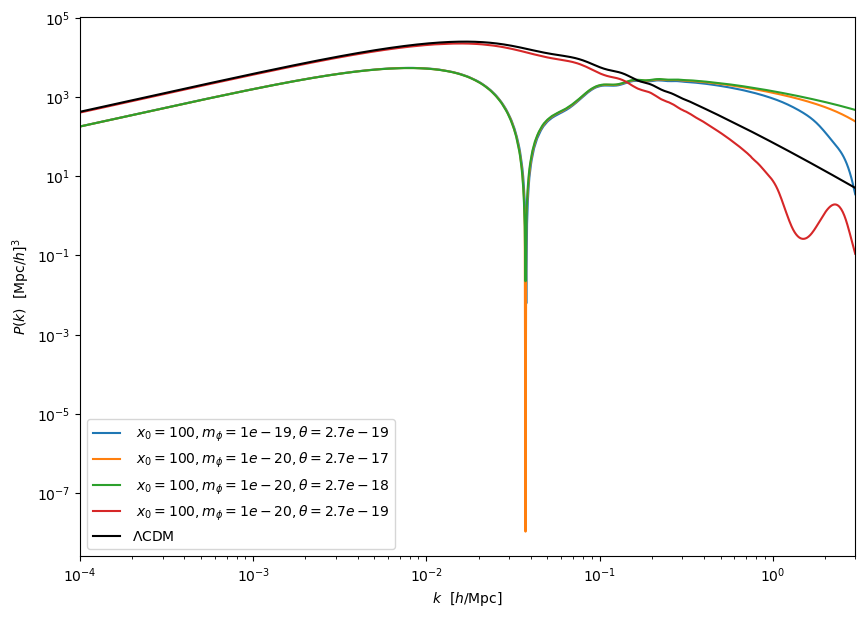

In [52]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations5[8:12]):
    plt.plot(kk,Pk_all5[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

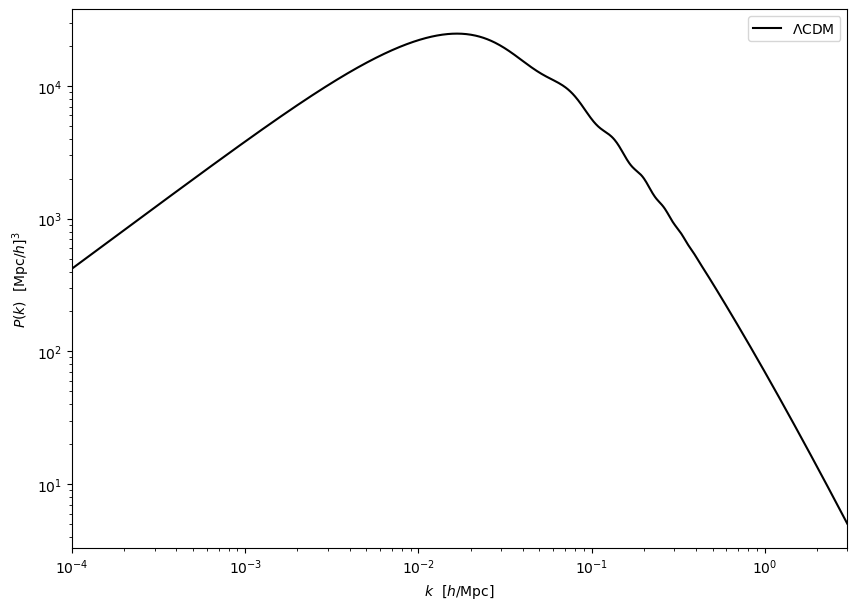

In [53]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, m, th) in enumerate(combinations5[12:16]):
    plt.plot(kk,Pk_all5[i], label = f" $x_0 = {x0}, m_\phi = {m}, \\theta = {th}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()